# Learning scikit-learn 

## An Introduction to Machine Learning in Python

### at PyData Chicago 2016 

enhancing _Sebastian Raschka_ codes

# Table of Contents

* [1 Introduction to Machine Learning](#1-Introduction-to-Machine-Learning)
* [2 Linear Regression](#2-Linear-Regression)
    * [Loading the dataset](#Loading-the-dataset)
    * [Preparing the dataset](#Preparing-the-dataset)
    * [Fitting the model](#Fitting-the-model)
    * [Evaluating the model](#Evaluating-the-model)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1 Introduction to Machine Learning

# 2 Linear Regression

### Loading the dataset

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to 
to the Size of the Head", Biometrika, Vol. 4, pp105-123


Description: Brain weight (grams) and head size (cubic cm) for 237
adults classified by gender and age group.


Variables/Columns
- Gender (1=Male, 2=Female)
- Age Range (1=20-46, 2=46+)
- Head size (cm^3)
- Brain weight (grams)


In [6]:
df = pd.read_csv('dataset_brain.txt', 
                 dtype={'gender': int, 'age-group': int},
                 encoding='utf-8', 
                 comment='#',
                 sep='\s+')
df.tail()

,gender,age-group,head-size,brain-weight
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170
236,2,2,3391,1120


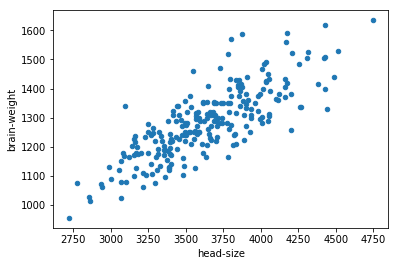

In [9]:
df.plot(x='head-size', y='brain-weight', kind='scatter')

#seems some outliers or a transformation need

In [24]:
df['log_head-size'] = np.log(df['head-size'])

df['log_brain-weight'] = np.log(df['brain-weight'])

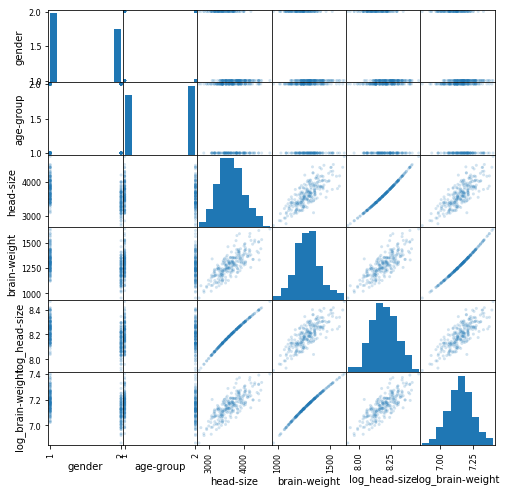

In [80]:
z = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(8, 8))

# log transformation seems not promising!

In [20]:
df.groupby(['age-group', 'gender']).size()

# seems we can use 2 categorical feature

age-group  gender
1          1         57
           2         53
2          1         77
           2         50
dtype: int64

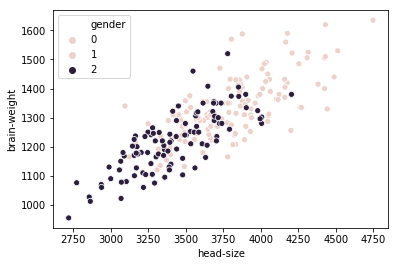

In [27]:
# for females, data has more variance.

sns.scatterplot(x='head-size', y='brain-weight', hue='gender', data=df)

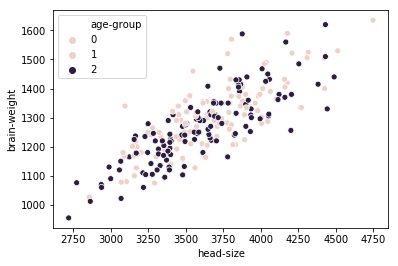

In [17]:
# 

sns.scatterplot(x='head-size', y='brain-weight', hue='age-group', data=df)

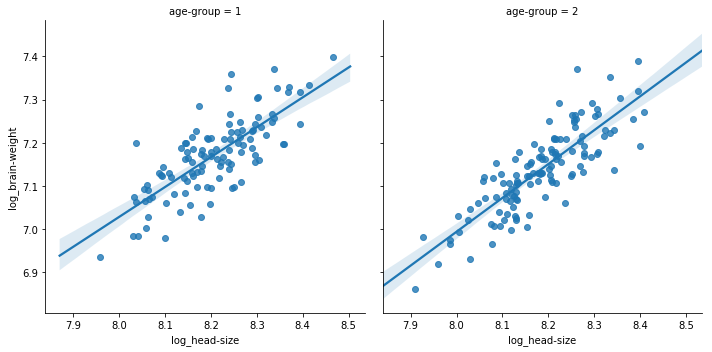

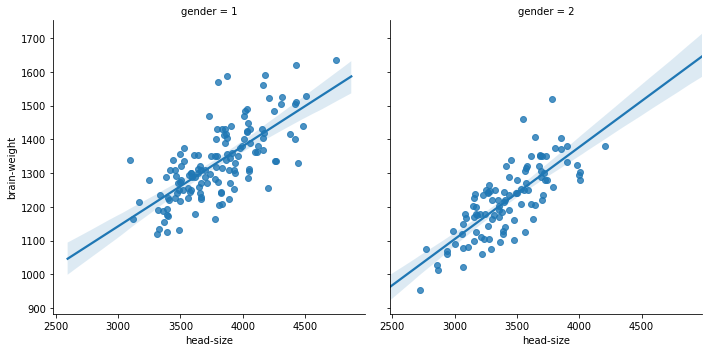

In [30]:
sns.lmplot(x='log_head-size', y='log_brain-weight', col='age-group', data=df)
sns.lmplot(x='head-size', y='brain-weight', col='gender', data=df)

### Preparing the dataset

- head-size -> r-squared: %64
- log_head-size-> r-squared: %65

In [66]:
y = df['brain-weight'].values
y.shape

(237,)

In [67]:
X = df['head-size'].values
X = X[:, np.newaxis]
X.shape

(237, 1)

In [68]:
X[0:3]

array([[4512],
       [3738],
       [4261]])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=125)

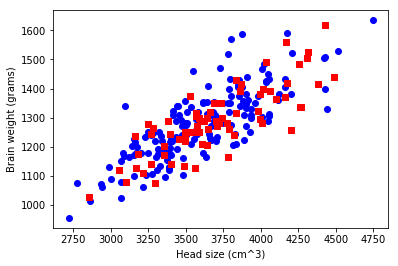

In [70]:

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.scatter(X_test, y_test, c='red', marker='s')
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

### Fitting the model

In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
print('r-squared:', lr.score(X_train, y_train),
      '\nadjusted r-squared:', 1- (1-lr.score(X_train, y_train)) * (X_train.shape[0]-1) / (X_train.shape[0]-X_train.shape[1]-1))


r-squared: 0.6354950230876757 
adjusted r-squared: 0.6332587962354528


In [75]:
y_pred = lr.predict(X_test)

y_hat_train = lr.predict(X_train)

### Evaluating the model

- r-squared of X_train vs r-squared of X_test
- prediction of X_train (y_hat_train) vs y_train 


In [76]:
print(f'R2 score: {lr.score(X_test, y_test)}' )

R2 score: 0.6404876746354844


In [77]:
lr.coef_[0], lr.intercept_

# y(weight) = 302 + 0.27 * x(size)

(0.26944099519766185, 308.53548372134196)

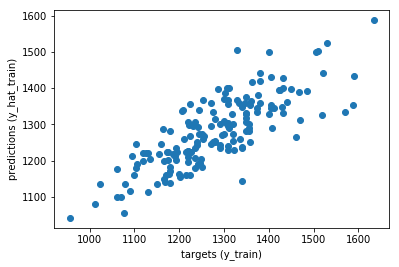

In [78]:
plt.scatter(y_train, y_hat_train)
plt.xlabel('targets (y_train)')
plt.ylabel('predictions (y_hat_train)')


plt.show()

# 45 degrees means it is ok.

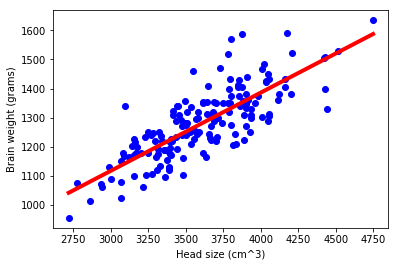

In [79]:
min_pred = X_train.min() * lr.coef_ + lr.intercept_
max_pred = X_train.max() * lr.coef_ + lr.intercept_

plt.scatter(X_train, y_train, c='blue', marker='o')
plt.plot([X_train.min(), X_train.max()],
         [min_pred, max_pred],
         color='red',
         linewidth=4)
plt.xlabel('Head size (cm^3)')
plt.ylabel('Brain weight (grams)');

<div style='height:100px;'></div>